## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

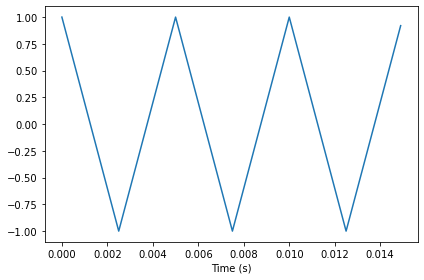

In [2]:
from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(200)
duration = signal.period * 3
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()
decorate(xlabel = 'Time (s)')

Make a wave and play it.

In [3]:
wave = signal.make_wave(duration = 0.5, framerate = 10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

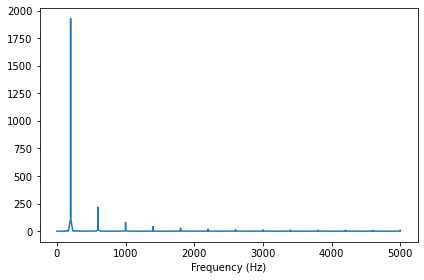

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

Make a square signal and plot a 3 period segment.

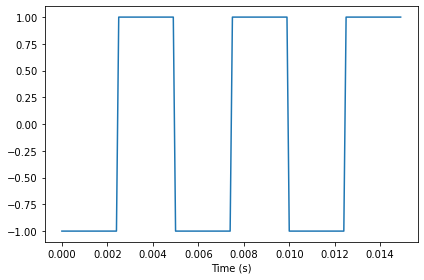

In [5]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
duration = signal.period * 3
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()
decorate(xlabel = 'Time (s)')

Make a wave and play it.

In [6]:
wave = signal.make_wave(duration = 0.5, framerate = 10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

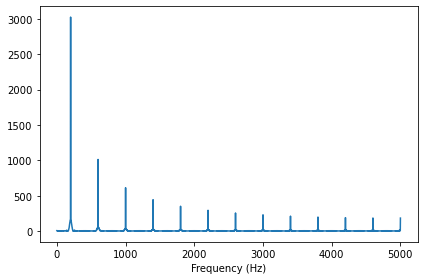

In [7]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

Create a sawtooth signal and plot a 3 period segment.

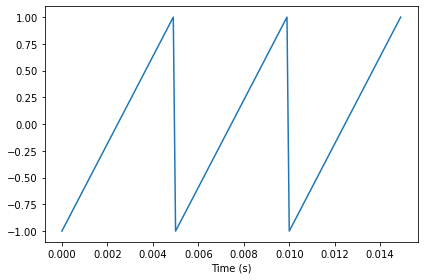

In [30]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(200)
duration = signal.period * 3
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()
decorate(xlabel = 'Time (s)')

Make a wave and play it.

In [31]:
wave = signal.make_wave(duration = 0.5, framerate = 10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

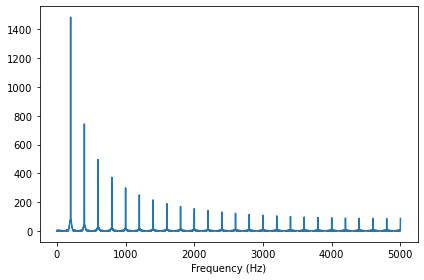

In [32]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

### Aliasing

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

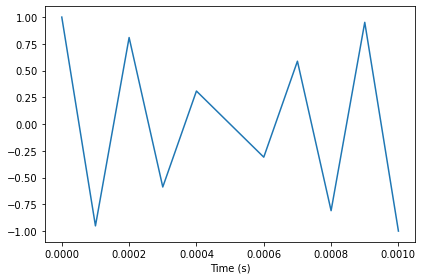

In [11]:
from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period * 5
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()
decorate(xlabel = 'Time (s)')

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

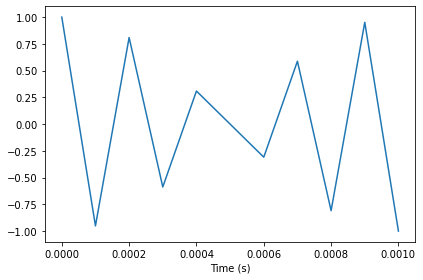

In [12]:
signal = CosSignal(5500)
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()
decorate(xlabel = 'Time (s)')

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

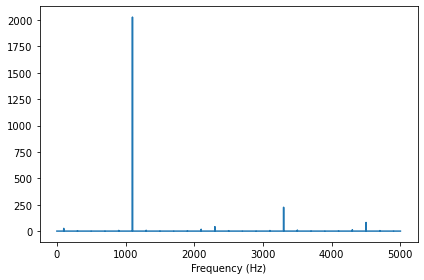

In [13]:
signal = TriangleSignal(1100)
segment = signal.make_wave(duration = 0.5, framerate = 10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

## Amplitude and phase

Make a sawtooth wave.

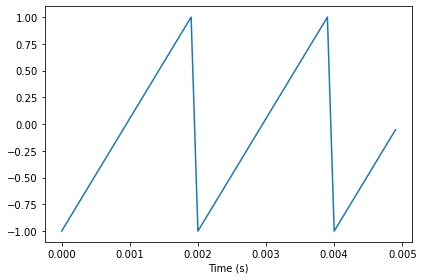

In [14]:
signal = SawtoothSignal(500)
wave = signal.make_wave(duration = 1, framerate = 10000)
segment = wave.segment(duration = 0.005)
segment.plot()
decorate(xlabel = 'Time (s)')

Play it.

In [15]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [16]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [17]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

Plot the magnitudes vs the frequencies.

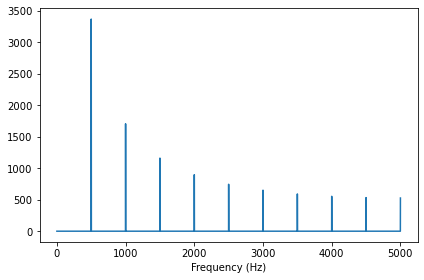

In [18]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel = 'Frequency (Hz)')

Plot the phases vs the frequencies.

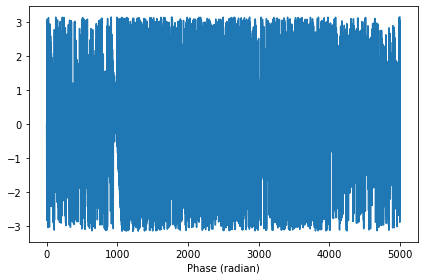

In [19]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel = 'Phase (radian)')

## What does phase sound like?

Shuffle the phases.

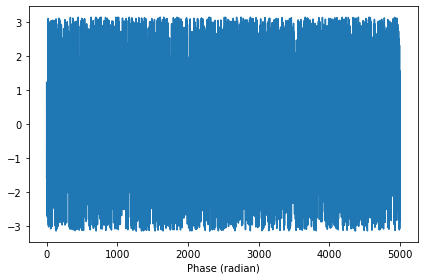

In [20]:
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel = 'Phase (radian)')

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [21]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

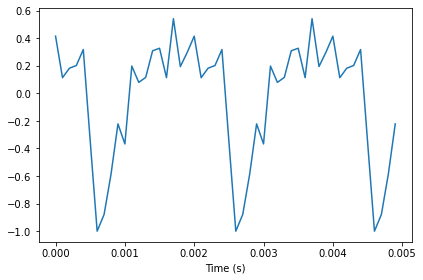

In [22]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration = 0.005)
segment.plot()
decorate(xlabel = 'Time (s)')

Play the wave with the shuffled phases.

In [23]:
wave2.make_audio()

For comparison, here's the original wave again.

In [24]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [25]:
def view_harmonics(freq, framerate):
    """Plot the spectrum of a sawtooth signal.
    
    freq: frequency in Hz
    framerate: in frames/second
    """
    signal = SawtoothSignal(freq)
    wave = signal.make_wave(duration = 0.5, framerate = framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color = 'C0')
    decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')
    display(wave.make_audio())

In [26]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min = 100, max = 10000, value = 100, step = 100)
slider2 = widgets.FloatSlider(min = 5000, max = 40000, value = 10000, step = 1000)
interact(view_harmonics, freq = slider1, framerate = slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

Exercise 1
A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats.
Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.
Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

In [37]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [38]:
sawtooth = SawtoothSignal().make_wave(duration = 0.5, framerate = 20000)
sawtooth.make_audio()

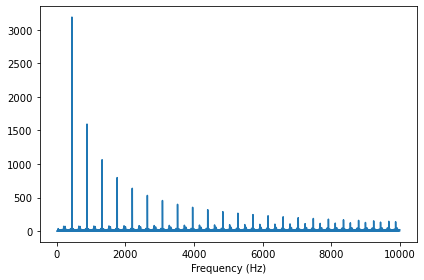

In [39]:
sawtooth.make_spectrum().plot()
decorate(xlabel = 'Frequency (Hz)')

Compared to a square wave, the sawtooth drops off similarly, but it includes both even and odd harmonics.

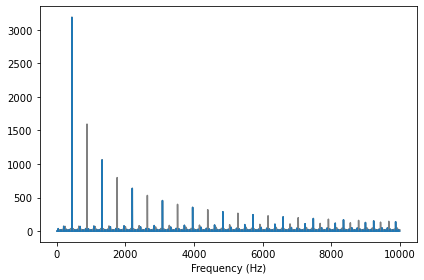

In [41]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color = 'gray')
square = SquareSignal(amp = 0.5).make_wave(duration = 0.5, framerate = 20000)
square.make_spectrum().plot()
decorate(xlabel = 'Frequency (Hz)')

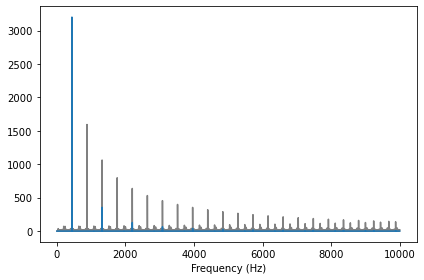

In [42]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color = 'gray')
triangle = TriangleSignal(amp = 0.79).make_wave(duration = 0.5, framerate = 20000)
triangle.make_spectrum().plot()
decorate(xlabel = 'Frequency (Hz)')

Specifically, the harmonics of the triangle wave drop off in proportion to 1/𝑓^2 , while the sawtooth drops off like 1/𝑓.

Exercise 2
Make a square signal at 1500 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

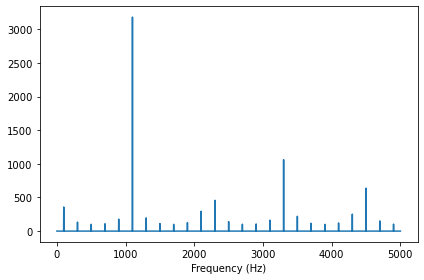

In [44]:
square = SquareSignal(1100).make_wave(duration = 0.5, framerate = 10000)
square.make_spectrum().plot()
decorate(xlabel = 'Frequency (Hz)')

We can see the fundamental at 1100 Hz and the first harmonic at 3200 Hz, but the second harmonic, which should be at 5300 Hz, is aliased to 4300 Hz.
The third harmonic, which should be at 7400 Hz, ends up at 2200 Hz.
And the 4th harmonic, which should be at 9500 Hz, would get aliased to -100 Hz, but that gets aliased again to 100 Hz.
The 5th harmonic, which should be at 11600 Hz, ends up at 1100 Hz, so it contributes to the fundamental.
The remaining harmonics overlap with the ones we've already seen.

When we listen to the wave, the fundamental pitch you perceive is the alias at 100 Hz.

In [46]:
square.make_audio()

Compare it to this 500 Hz sine wave:

In [47]:
from thinkdsp import SinSignal

SinSignal(500).make_wave(duration = 0.5, framerate = 10000).make_audio()

### Exercise 3

If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that the frequencies start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1.    Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2.    Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3.    Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

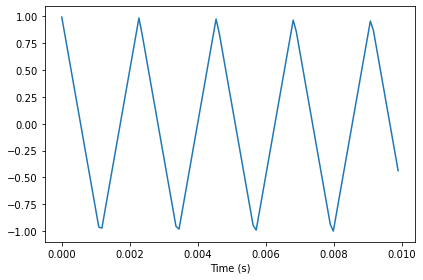

In [48]:
triangle = TriangleSignal(440).make_wave(duration = 0.01)
triangle.plot()
decorate(xlabel = 'Time (s)')

In [49]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

If we add to the zero-frequency component, it has the effect of adding a vertical offset to the wave.

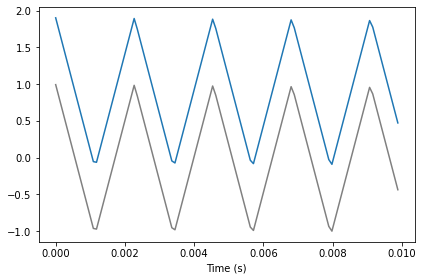

In [50]:
spectrum.hs[0] = 100
triangle.plot(color = 'gray')
spectrum.make_wave().plot()
decorate(xlabel = 'Time (s)')

The zero-frequency component is the total of all the values in the signal, as we'll see when we get into the details of the DFT. If the signal is unbiased, the zero-frequency component is 0. In the context of electrical signals, the zero-frequency term is called the DC offset; that is, a direct current offset added to an AC signal.

### Exercise 4

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Test your function using one of the WAV files in the repository or any Wave object.

1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

In [68]:
def filter_spectrum(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

In [69]:
wave = TriangleSignal(freq = 440).make_wave(duration = 0.5)
wave.make_audio()

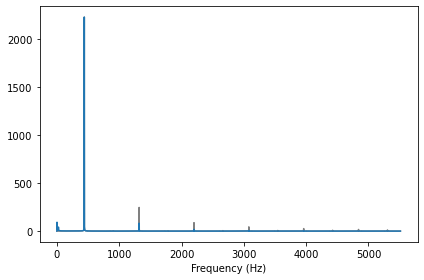

In [70]:
spectrum = wave.make_spectrum()
spectrum.plot(high = 10000, color = 'gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high = 10000)
decorate(xlabel = 'Frequency (Hz)')

The filter clobbers the harmonics, so it acts like a low pass filter.

In [71]:
filtered = spectrum.make_wave()
filtered.make_audio()

The triangle wave now sounds almost like a sine wave.

In [72]:
wave = SquareSignal(freq = 440).make_wave(duration = 0.5)
wave.make_audio()

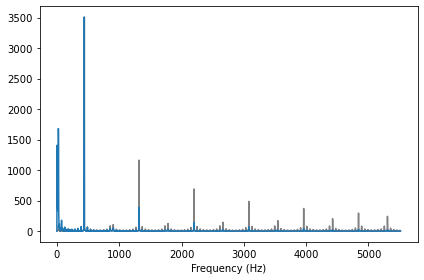

In [73]:
spectrum = wave.make_spectrum()
spectrum.plot(high = 10000, color = 'gray')
filter_spectrum(spectrum1)
spectrum.scale(440)
spectrum.plot(high = 10000)
decorate(xlabel = 'Frequency (Hz)')

In [74]:
filtered = spectrum1.make_wave()
filtered.make_audio()

The square wave now sounds almost like a sine wave.

### Exercise 5
The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to 1/𝑓; the harmonics of the triangle wave drop off like 1/𝑓^2. Can you find a waveform that has even and odd harmonics that drop off like 1/𝑓^2?

In [80]:
signal = SawtoothSignal(freq = 1000)
wave = signal.make_wave(duration = 0.5, framerate = 20000)
wave.make_audio()

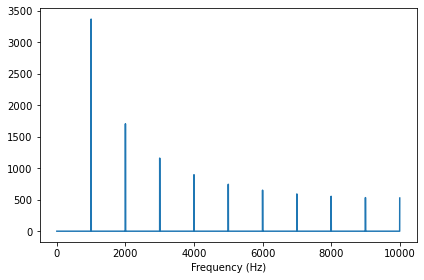

In [81]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

If we apply the filter we wrote in the previous exercise, we can make the harmonics drop off like 1/𝑓^2.

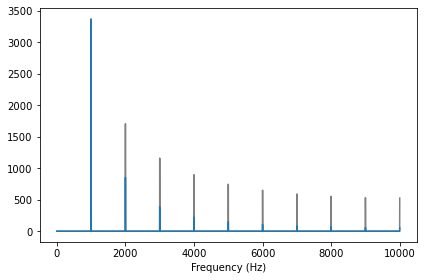

In [82]:
spectrum.plot(color = 'gray')
filter_spectrum(spectrum)
spectrum.scale(1000)
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

In [83]:
wave = spectrum.make_wave()
wave.make_audio()

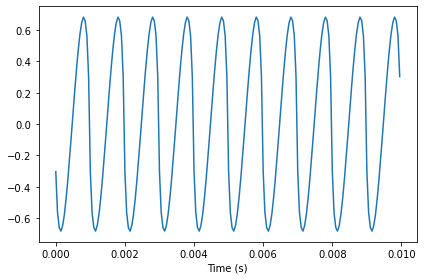

In [84]:
wave.segment(duration = 0.01).plot()
decorate(xlabel = 'Time (s)')

It's an interesting shape, but not easy to see what its functional form is.
Another approach is to add up a series of cosine signals with the right frequencies and amplitudes.

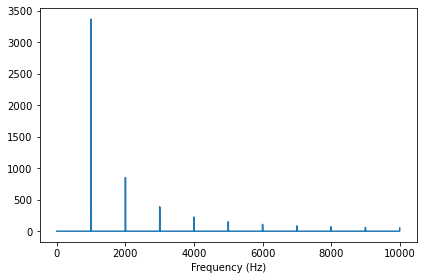

In [85]:
from thinkdsp import CosSignal

freqs = np.arange(500, 9500, 500)
amps = 1 / freqs ** 2
signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

In [86]:
wave = signal.make_wave(duration = 0.5, framerate = 20000)
wave.make_audio()

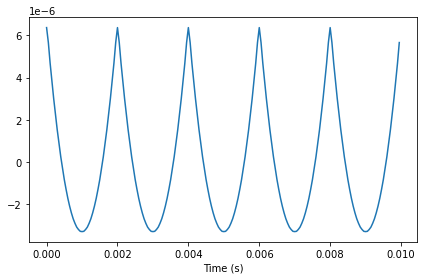

In [87]:
wave.segment(duration = 0.01).plot()
decorate(xlabel = 'Time (s)')

In [88]:
from thinkdsp import ParabolicSignal

wave = ParabolicSignal(freq = 1000).make_wave(duration = 0.5, framerate = 20000)
wave.make_audio()

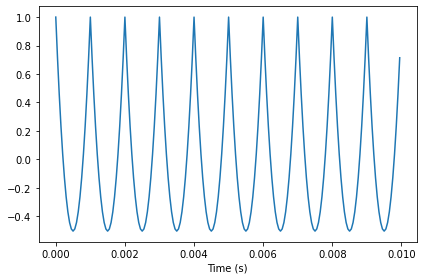

In [89]:
wave.segment(duration = 0.01).plot()
decorate(xlabel = 'Time (s)')

A parabolic signal has even and odd harmonics which drop off like 1/𝑓^2:

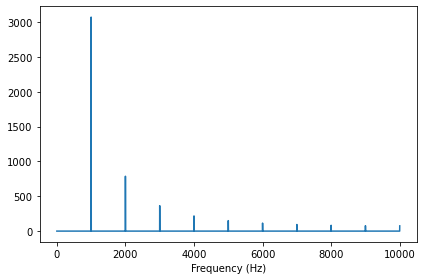

In [90]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')